# Setup Enviroment
Import necessary library.

In [ ]:
from __future__ import absolute_import, division, print_function
import os
import numpy as np
import pathlib
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import time
from tensorflow import keras
from tensorflow.keras import layers

# Setup State
*   y = yes
*   n = no
* load_state should be set to 'n'

In [ ]:
train_state = 'y'
early_stop_state = 'y'
save_state = 'y'
load_state = 'n'
model_num = 4
#coal_prop = ['AR_Carbon','AR_Nitrogen','AR_Hydrogen_Inc','AR_Oxygen_Inc','AR_Hydrogen_Exc','AR_Oxygen_Exc',]
coal_prop = ['AR_Carbon','AR_Nitrogen','AR_Hydrogen_Exc','AR_Oxygen_Exc',]

In [ ]:
if save_state == 'y':
  !pip install tensorflowjs

# Import Dataset using pandas
Dataset use for train and test model.

In [ ]:
car_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/main/dataset/coal_car_ds.csv"
nit_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/main/dataset/coal_nit_ds.csv"
#hyd_inc_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/new-ds/dataset/coal_hyd_inc_ds.csv"
#oxy_inc_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/new-ds/dataset/coal_oxy_inc_ds.csv"
hyd_exc_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/main/dataset/coal_hyd_exc_ds.csv"
oxy_exc_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/main/dataset/coal_oxy_exc_ds.csv"

car_dataset = pd.read_csv(car_dataset_url)
nit_dataset = pd.read_csv(nit_dataset_url)
#hyd_inc_dataset = pd.read_csv(hyd_inc_dataset_url)
#oxy_inc_dataset = pd.read_csv(oxy_inc_dataset_url)
hyd_exc_dataset = pd.read_csv(hyd_exc_dataset_url)
oxy_exc_dataset = pd.read_csv(oxy_exc_dataset_url)

#print(car_dataset)
#print(nit_dataset)
#print(hyd_inc_dataset)
#print(oxy_inc_dataset)
print(hyd_exc_dataset)
print(oxy_exc_dataset)

      p_ar_mois  p_ar_vol  p_ar_ash  p_ar_fc  p_ar_sul  u_ar_car
0        31.940    24.980    26.550   16.530     2.575    28.868
1        30.650    25.630    27.810   15.910     3.197    29.064
2        31.630    25.190    26.230   16.950     2.742    29.334
3        31.480    25.450    25.580   17.490     2.718    29.967
4        31.210    25.320    27.460   16.010     2.640    28.775
...         ...       ...       ...      ...       ...       ...
2910     30.801    29.847    21.550   17.802     2.220    33.308
2911     29.166    30.587    21.666   18.580     2.063    34.143
2912     26.794    31.937    21.577   19.692     2.202    36.025
2913     30.077    30.427    19.828   19.668     1.902    35.185
2914     29.576    30.438    19.502   20.484     1.998    35.618

[2915 rows x 6 columns]
      p_ar_mois  p_ar_vol  p_ar_ash  p_ar_fc  p_ar_sul  u_ar_nit
0        31.940    24.980    26.550   16.530     2.575     1.077
1        30.650    25.630    27.810   15.910     3.197     0.957


In [ ]:
#dataset = [car_dataset,nit_dataset,hyd_inc_dataset,oxy_inc_dataset,hyd_exc_dataset,oxy_exc_dataset]
dataset = [car_dataset,nit_dataset,hyd_exc_dataset,oxy_exc_dataset]

# Clean data
Done in excel.

In [ ]:
#car_dataset.isna().sum()

p_ar_mois    0
p_ar_vol     0
p_ar_ash     0
p_ar_fc      0
p_ar_sul     0
u_ar_car     0
dtype: int64

In [ ]:
#nit_dataset.isna().sum()

p_ar_mois    0
p_ar_vol     0
p_ar_ash     0
p_ar_fc      0
p_ar_sul     0
u_ar_nit     0
dtype: int64

In [ ]:
#hyd_inc_dataset.isna().sum()

In [ ]:
#oxy_inc_dataset.isna().sum()

In [ ]:
#hyd_exc_dataset.isna().sum()

p_ar_mois       0
p_ar_vol        0
p_ar_ash        0
p_ar_fc         0
p_ar_sul        0
u_ar_hyd_exc    0
dtype: int64

In [ ]:
#oxy_exc_dataset.isna().sum()

p_ar_mois       0
p_ar_vol        0
p_ar_ash        0
p_ar_fc         0
p_ar_sul        0
u_ar_oxy_exc    0
dtype: int64

# Input Data
Just a test dataset that input manually. Use with load_state ='y'

In [ ]:
input_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/main/dataset/coal_ds.csv"
#input_data = {'p_ar_mois':[31.94],'p_ar_vol':[24.98],'p_ar_ash':[26.55],'p_ar_fc':[16.53],'p_ar_sul':[2.575],'p_ar_hhv':[2685.737],'p_ar_lhv':[2390.733]}
input_data = {'p_ar_mois':[31.94],'p_ar_vol':[24.98],'p_ar_ash':[26.55],'p_ar_fc':[16.53],'p_ar_sul':[2.575]}
input_dataset = pd.read_csv(input_dataset_url)
input_data = pd.DataFrame(data = input_data)
#print(input_dataset)
#print(input_data)

      p_ar_mois  p_ar_vol  p_ar_ash  p_ar_fc  p_ar_sul
0        31.940    24.980    26.550   16.530     2.575
1        30.650    25.630    27.810   15.910     3.197
2        31.630    25.190    26.230   16.950     2.742
3        31.480    25.450    25.580   17.490     2.718
4        31.210    25.320    27.460   16.010     2.640
...         ...       ...       ...      ...       ...
2910     30.801    29.847    21.550   17.802     2.220
2911     29.166    30.587    21.666   18.580     2.063
2912     26.794    31.937    21.577   19.692     2.202
2913     30.077    30.427    19.828   19.668     1.902
2914     29.576    30.438    19.502   20.484     1.998

[2915 rows x 5 columns]
   p_ar_mois  p_ar_vol  p_ar_ash  p_ar_fc  p_ar_sul
0      31.94     24.98     26.55    16.53     2.575


# Split data into Train and Test
Test 80%: Test 20%

In [ ]:
ds_frac = 0.8
def train_ds(x):
  return (x.sample(frac = ds_frac,random_state = 0))
def test_ds (x):
  return x.drop((x.sample(frac = ds_frac,random_state = 0)).index)

In [ ]:
train_dataset = [1,2,3,4]
test_dataset = [1,2,3,4]
for i in range(model_num):
  train_dataset[i] = train_ds(dataset[i])
#test_dataset = [1,2,3,4]
for i in range (model_num):
  test_dataset[i] = test_ds(dataset[i])

#print(train_dataset[0])
#print(train_dataset[1])
#print(train_dataset[2])
#print(train_dataset[3])
#print(train_dataset[4])
#print(train_dataset[5])

# Inspect Data

In [ ]:
#sns.pairplot(train_dataset[0][["p_mois","p_vol","p_ash","p_car","p_sul","u_car"]], diag_kind="kde")# Use
#sns.pairplot(train_dataset[1][["p_mois","p_vol","p_ash","p_car","p_sul","u_hyd"]], diag_kind="kde")# Use
#sns.pairplot(train_dataset[2][["p_mois","p_vol","p_ash","p_car","p_sul","u_nit"]], diag_kind="kde")# Use

# Overall Stat

In [ ]:
train_stats = [1,2,3,4]
#train_pop = ["u_ar_car","u_ar_nit","u_ar_hyd_inc","u_ar_oxy_inc","u_ar_hyd_exc","u_ar_oxy_exc"]
train_pop = ["u_ar_car","u_ar_nit","u_ar_hyd_exc","u_ar_oxy_exc"]
for i in range(model_num):
  train_stats[i] = train_dataset[i].describe()
  train_stats[i].pop(str(train_pop[i]))
  train_stats[i] = train_stats[i].transpose()
train_stats[1]

,count,mean,std,min,25%,50%,75%,max
p_ar_mois,2332.0,29.854001,1.755956,25.060,28.6675,29.750,30.93000,35.861
p_ar_vol,2332.0,27.549441,1.439363,22.420,26.5400,27.625,28.64000,31.937
p_ar_ash,2332.0,25.216928,3.992142,14.179,22.7900,25.775,28.23000,35.550
p_ar_fc,2332.0,17.379639,2.359325,11.740,15.7150,17.100,18.87000,25.280
p_ar_sul,2332.0,2.743728,0.395033,1.529,2.4860,2.754,2.97625,4.456


# Split feature form label
Separate the target value (label) form feature. Label = value that train model to predict.

In [ ]:
train_label = [1,2,3,4]
test_label = [1,2,3,4]
for i in range(model_num):
  train_label[i] = train_dataset[i].pop(str(train_pop[i]))
  test_label[i] = test_dataset[i].pop(str(train_pop[i]))

#print(train_label[1])
#print(test_label[1])

# Normalize Data

In [ ]:
normed_train_data = [1,2,3,4]
normed_test_data = [1,2,3,4]
normed_input_data = [1,2,3,4]
normed_input_dataset = [1,2,3,4]
for i in range(model_num):
  normed_train_data[i] = (train_dataset[i] - train_stats[i]['mean']) / train_stats[i]['std']
  normed_test_data[i] = (test_dataset[i] - train_stats[i]['mean']) / train_stats[i]['std']
  normed_input_data[i] = (input_data - train_stats[i]['mean']) / train_stats[i]['std']
  normed_input_dataset[i] = (input_dataset - train_stats[i]['mean']) / train_stats[i]['std']

#print(normed_train_data[1])
#print(normed_test_data[1])
#print(normed_input_data[1])
#print(normed_input_dataset[1])

# The Model

In [ ]:
def build_model_1(x):
  model = keras.Sequential([
    layers.Dense(512,activation = tf.nn.relu, input_shape = [len(x.keys())]),
    layers.Dense(256,activation = tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile (loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse'])
  return model

In [ ]:
def build_model_2(x):
  model = keras.Sequential([
    layers.Dense(1024,activation = tf.nn.relu, input_shape = [len(x.keys())]),
    layers.Dense(512,activation = tf.nn.relu),
    layers.Dense(256,activation = tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile (loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse'])
  return model

In [ ]:
def build_model_3(x):
  model = keras.Sequential([
    layers.Dense(64,activation = tf.nn.relu, input_shape = [len(x.keys())]),
    layers.Dense(32,activation = tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile (loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse'])
  return model

# Select Model
Select from above in this case use build_model_3

In [ ]:
model_pre = [1,2,3,4]
for i in range(model_num):
  model_pre[i] = build_model_3(train_dataset[i])

#Train Model
Train model for 1500 epochs, and recoed the training and validation accuracy in the history object. If early stop is enable trining can stop before 1500 epochs.

In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end = '')
  
EPOCHS = 1500

In [ ]:
history = [1,2,3,4]
if train_state == 'y':
  if early_stop_state == 'y':
    for i in range(model_num):
      early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
      history[i] = model_pre[i].fit(
      normed_train_data[i], train_label[i],
      epochs = EPOCHS, validation_split = 0.2, verbose = 0,
      callbacks = [early_stop, PrintDot()])
      print(' Finish train model: ' + str(coal_prop[i]))
  else:
    for i in range(model_num):
      history[i] = model_pre[i].fit(
      normed_train_data[i], train_label[i],
      epochs = EPOCHS, validation_split = 0.2, verbose = 0,
      callbacks = [PrintDot()])
      print(' Finish train model: ' + str(coal_prop[i]))
else:
  print('Not train')


....................................................................................................
....................................................................................................
................................................... Finish train model: AR_Carbon

....................................................................................................
....................................................................................................
. Finish train model: AR_Nitrogen

....................................................................................................
......... Finish train model: AR_Hydrogen_Exc

....................................................................................... Finish train model: AR_Oxygen_Exc


Visualize the model's training progress using the stat stored in the History object.

In [ ]:
def plot_history(history):

  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.xlabel('Mean Abs Error [Output]')
  plt.plot(hist['epoch'], hist['mae'],
           label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()
  plt.title(coal_prop[i])

  plt.figure()
  plt.xlabel('Epoch')
  plt.xlabel('Mean Square Error [$Output^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.legend()
  plt.title(coal_prop[i])

************************************************************************************
AR_Carbon
         loss       mae       mse  val_loss   val_mae   val_mse  epoch
246  0.293985  0.386631  0.293985  0.526172  0.576001  0.526172    246
247  0.312970  0.397856  0.312970  0.288519  0.401309  0.288519    247
248  0.304667  0.392360  0.304667  0.287179  0.403976  0.287179    248
249  0.303033  0.391014  0.303033  0.342665  0.447080  0.342665    249
250  0.307481  0.395150  0.307481  0.391154  0.499456  0.391154    250
************************************************************************************
AR_Nitrogen
         loss       mae       mse  val_loss   val_mae   val_mse  epoch
196  0.004940  0.051478  0.004940  0.008298  0.065714  0.008298    196
197  0.005004  0.051813  0.005004  0.006039  0.059112  0.006039    197
198  0.004928  0.051465  0.004928  0.005858  0.057464  0.005858    198
199  0.004906  0.051565  0.004906  0.006444  0.059347  0.006444    199
200  0.004880  0.051501  0.

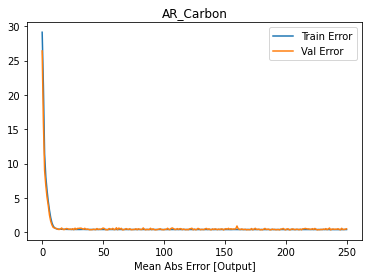

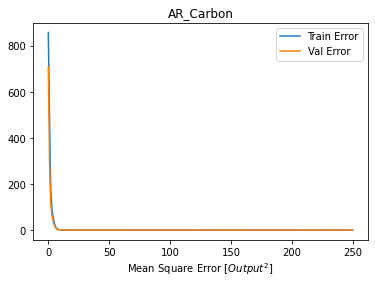

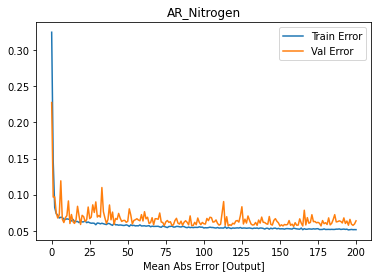

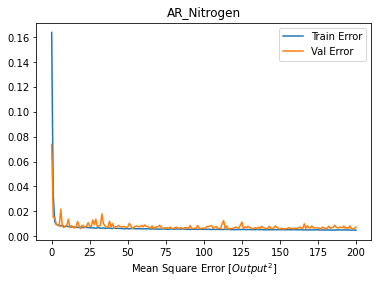

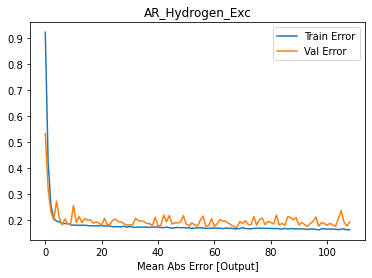

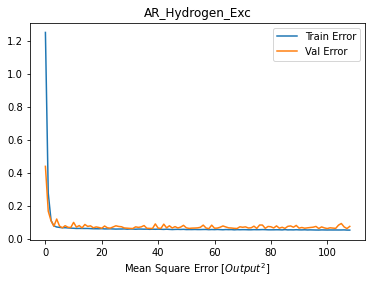

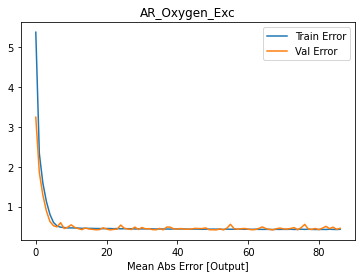

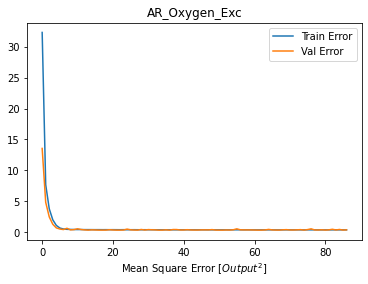

In [ ]:
hist = [1,2,3,4]
if train_state == 'y':
  for i in range(model_num):
    hist[i] = pd.DataFrame(history[i].history)
    hist[i]['epoch'] = history[i].epoch
    print('************************************************************************************')
    print(coal_prop[i])
    print(hist[i].tail())
    #plot_history(history[i],coal_prop[i])
    plot_history(history[i])
else:
  print()

In [ ]:
rmse_val = [1,2,3,4]
for i in range(model_num):
  loss_val, mae_val, mse_val = model_pre[i].evaluate(normed_test_data[i], test_label[i], verbose = 0)
  rmse_val[i] = math.sqrt(mse_val)
  print(coal_prop[i])
  print("Testing set Mean Abs Error: {:5.2f}".format(mae_val))
  print("Testing set RMSE: {:5.2f}".format(math.sqrt(mse_val)))
  print('**********************************************************')


AR_Carbon
Testing set Mean Abs Error:  0.54
Testing set RMSE:  0.68
**********************************************************
AR_Nitrogen
Testing set Mean Abs Error:  0.06
Testing set RMSE:  0.09
**********************************************************
AR_Hydrogen_Exc
Testing set Mean Abs Error:  0.20
Testing set RMSE:  0.27
**********************************************************
AR_Oxygen_Exc
Testing set Mean Abs Error:  0.45
Testing set RMSE:  0.62
**********************************************************


# Make Prediction
Predict Output value using data in testing set (20%)

In [ ]:
test_pred = [1,2,3,4]
for i in range(model_num):
  test_pred[i] = model_pre[i].predict(normed_test_data[i]).flatten()

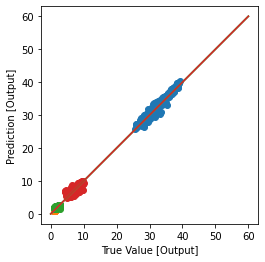

In [ ]:
for i in range(model_num):
  plt.scatter(test_label[i], test_pred[i])
  #plt.title(coal_prop[i])
  plt.xlabel('True Value [Output]')
  plt.ylabel('Prediction [Output]')
  plt.axis('equal')
  plt.axis('square')
  _ = plt.plot([0,60], [0,60])

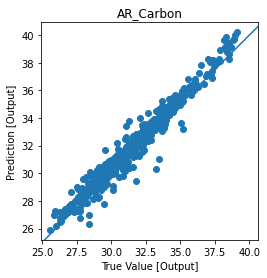

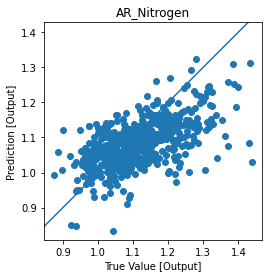

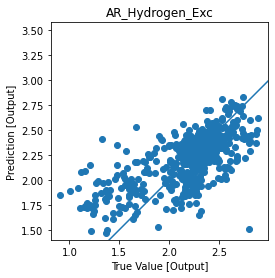

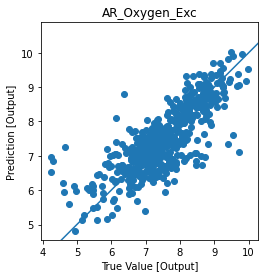

In [ ]:
for i in range(model_num):
  plt.scatter(test_label[i], test_pred[i])
  plt.title(coal_prop[i])
  plt.xlabel('True Value [Output]')
  plt.ylabel('Prediction [Output]')
  plt.axis('equal')
  plt.axis('square')
  _ = plt.plot([0,100], [0,100])
  plt.show()

# Save and load Model
* Save the model in .h5 and .json format
* load model from file to test with input dataset (Normally load_stae = 'n')

In [ ]:
#model_save_name = ['ar_car.h5','ar_nit_model.h5','ar_hyd_inc_model.h5','ar_oxy_inc_model.h5','ar_hyd_exc_model.h5','ar_oxy_exc_model.h5']
model_save_name = ['/content/model/carbon/ar_car.h5','/content/model/nitrogen/ar_nit_model.h5','/content/model/hydrogen_exc/ar_hyd_exc_model.h5','/content/model/oxygen_exc/ar_oxy_exc_model.h5']
if save_state == 'y':
  for i in range(model_num):
    model_pre[i].save(model_save_name[i])
    !tensorflowjs_converter --input_format=keras /content/model/carbon/ar_car.h5 /content/model/carbon
    !tensorflowjs_converter --input_format=keras /content/model/nitrogen/ar_nit_model.h5 /content/model/nitrogen
    #!tensorflowjs_converter --input_format=keras /content/ar_hyd_inc_model.h5 /content/js/hyd_inc
    #!tensorflowjs_converter --input_format=keras /content/ar_oxy_inc_model.h5 /content/js/oxy_inc
    !tensorflowjs_converter --input_format=keras /content/model/hydrogen_exc/ar_hyd_exc_model.h5 /content/model/hydrogen_exc
    !tensorflowjs_converter --input_format=keras /content/model/oxygen_exc/ar_oxy_exc_model.h5 /content/model/oxygen_exc
  print("Model Saved")
else:
  print("Not save model") 

model_prod = [1,2,3,4]
if load_state =='y':
  for i in range(model_num):
    model_prod[i] = keras.models.load_model(model_save_name[i])
  print("Model Load")
else:
  print("Not load model Prod")

2021-02-23 03:55:58.779131: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-23 03:56:01.490574: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-23 03:56:04.229469: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-23 03:56:06.956589: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-23 03:56:09.698771: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-23 03:56:12.445410: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-23 03:56:15.153943: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic libr

# Compress and download
Compress the model in to model.zip and download in to your local drive.

In [ ]:
if save_state == 'y':
  !zip -r /content/model.zip /content/model
  from google.colab import files
  files.download("/content/model.zip")

  adding: content/model/ (stored 0%)
  adding: content/model/oxygen_exc/ (stored 0%)
  adding: content/model/oxygen_exc/ar_oxy_exc_model.h5 (deflated 57%)
  adding: content/model/oxygen_exc/group1-shard1of1.bin (deflated 8%)
  adding: content/model/oxygen_exc/model.json (deflated 75%)
  adding: content/model/hydrogen_exc/ (stored 0%)
  adding: content/model/hydrogen_exc/ar_hyd_exc_model.h5 (deflated 56%)
  adding: content/model/hydrogen_exc/group1-shard1of1.bin (deflated 7%)
  adding: content/model/hydrogen_exc/model.json (deflated 75%)
  adding: content/model/nitrogen/ (stored 0%)
  adding: content/model/nitrogen/ar_nit_model.h5 (deflated 56%)
  adding: content/model/nitrogen/group1-shard1of1.bin (deflated 7%)
  adding: content/model/nitrogen/model.json (deflated 75%)
  adding: content/model/carbon/ (stored 0%)
  adding: content/model/carbon/group1-shard1of1.bin (deflated 7%)
  adding: content/model/carbon/model.json (deflated 75%)
  adding: content/model/carbon/ar_car.h5 (deflated 63

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rmse_val_prod = [1,2,3,4]
if load_state =='y':
  for i in range(model_num):
    loss_val_prod, mae_val_prod, mse_val_prod = model_prod[i].evaluate(normed_test_data[i], test_label[i], verbose = 0)
    rmse_val_prod[i] = math.sqrt(mse_val_prod)
    print(coal_prop[i])
    print("Testing set Mean Abs Error: {:5.2f}".format(mae_val_prod))
    print("Testing set RMSE: {:5.2f}".format(math.sqrt(mse_val_prod)))
    print('**********************************************************')
else:
  print("Not load model Prod")

Not load model Prod


# Data Input Result
Result from input dataset (Normally this is not use)

In [ ]:
#print(normed_input_data[0])

In [ ]:
#input_data_pred = model_pre[0].predict(normed_input_data[0])
#input_data_pred

In [ ]:
input_data_pred = [1,2,3,4]
input_dataset_pred = [1,2,3,4]
output = ['ar_car.csv","ar_nit.csv','ar_hyd_inc.csv','ar_oxy_inc.csv','ar_hyd_exc.csv','ar_oxy_exc.csv']
print('Pre-production Model:')
for i in range(model_num):
  input_data_pred[i] = model_pre[i].predict(normed_input_data[i]).flatten()
  input_data_pred[i] = float(input_data_pred[i])
  print(str(coal_prop[i]) + ": {:5.3f}".format(input_data_pred[i]) + "  ,RMSE: {:5.3f}".format(rmse_val[i]))
print('***************************************************************************************')
print('Prodution Model:')
if load_state =='y':
  for i in range(model_num):
    input_data_pred[i] = model_prod[i].predict(normed_input_data[i]).flatten()
    input_data_pred[i] = float(input_data_pred[i])
    print(str(coal_prop[i]) + ": {:5.3f}".format(input_data_pred[i]) + "  ,RMSE: {:5.3f}".format(rmse_val_prod[i]))
else:
  print("Not load model Prod")

if load_state =='y':
  for i in range(model_num):
    input_dataset_pred[i] = model_prod[i].predict(normed_input_dataset[i])#.flatten()
    np.savetxt(output[i], input_dataset_pred[i], delimiter=",")
    #np.savetxt("score1.csv", input_dataset_pred[1], delimiter=",")
    #np.savetxt("score2.csv", input_dataset_pred[2], delimiter=",")
    print(input_dataset_pred[0])
    print(input_dataset_pred[1])
    print(input_dataset_pred[2])
    #input_dataset_pred[i] = float(input_dataset_pred[i])
    #print(str(coal_prop[i]) + ": {:5.3f}".format(input_dataset_pred[i]) + "  ,RMSE: {:5.3f}".format(rmse_val_prod[i]))
#else:
  #print("Not load model Prod")


Pre-production Model:
AR_Carbon: 29.080  ,RMSE: 0.677
AR_Nitrogen: 1.055  ,RMSE: 0.086
AR_Hydrogen_Exc: 2.069  ,RMSE: 0.273
AR_Oxygen_Exc: 6.768  ,RMSE: 0.616
***************************************************************************************
Prodution Model:
Not load model Prod
